# Stock Price Prediction And Forecasting Using Stacked LSTM

Libraries

In [3]:
import math
import numpy as np
import pandas_datareader as pdr
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [4]:
 df = pd.read_csv(r"C:\Users\priya\Downloads\archive (9)\TCS.csv")

In [5]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [6]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4134,2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.0,1345353,0.5402
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.0,837567,0.5166
4138,2021-04-30,TCS,EQ,3115.25,3099.00,3132.05,3020.00,3040.00,3035.65,3063.19,3072305,9.411057e+14,157829.0,1942473,0.6323


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1.shape

(4139,)

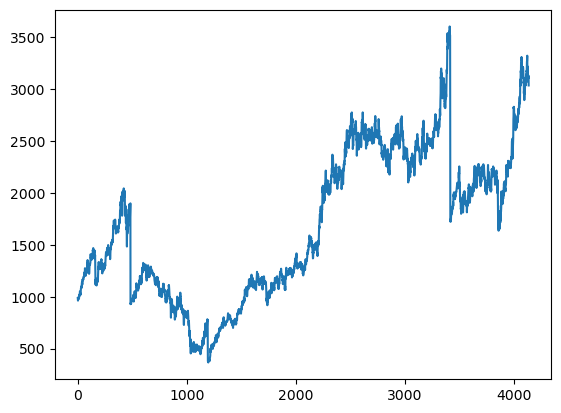

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np

# Spliting in to Train data and Test data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df.shape

(4139, 15)

In [13]:
df1

array([[0.19193401],
       [0.18916915],
       [0.18411826],
       ...,
       [0.85184041],
       [0.84910644],
       [0.82451615]])

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(2690, 1449)

In [16]:
import numpy

# converting a value of array in to dataset matrix

In [17]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
print(X_train)

[[0.19193401 0.18916915 0.18411826 ... 0.28773111 0.28614016 0.28722139]
 [0.18916915 0.18411826 0.19156331 ... 0.28614016 0.28722139 0.27698058]
 [0.18411826 0.19156331 0.19198035 ... 0.28722139 0.27698058 0.27716594]
 ...
 [0.65918043 0.66330455 0.66322732 ... 0.66083317 0.66052424 0.66274849]
 [0.66330455 0.66322732 0.66015353 ... 0.66052424 0.66274849 0.66330455]
 [0.66322732 0.66015353 0.6596747  ... 0.66274849 0.66330455 0.66832455]]


In [20]:
print(X_test.shape),print(y_test.shape)

(1348, 100)
(1348,)


(None, None)

In [21]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1) 

Epoch 1/100
41/41 [==============================] - 95s 2s/step - loss: 0.0116 - val_loss: 0.0036
Epoch 2/100
41/41 [==============================] - 38s 924ms/step - loss: 7.8258e-04 - val_loss: 0.0029
Epoch 3/100
41/41 [==============================] - 38s 922ms/step - loss: 6.9413e-04 - val_loss: 0.0027
Epoch 4/100
41/41 [==============================] - 28s 690ms/step - loss: 6.9525e-04 - val_loss: 0.0026
Epoch 5/100
41/41 [==============================] - 30s 725ms/step - loss: 6.4864e-04 - val_loss: 0.0027
Epoch 6/100
41/41 [==============================] - 31s 751ms/step - loss: 6.2351e-04 - val_loss: 0.0023
Epoch 7/100
41/41 [==============================] - 43s 1s/step - loss: 6.1692e-04 - val_loss: 0.0022
Epoch 8/100
41/41 [==============================] - 30s 736ms/step - loss: 6.2450e-04 - val_loss: 0.0026
Epoch 9/100
41/41 [==============================] - 32s 780ms/step - loss: 6.0403e-04 - val_loss: 0.0022
Epoch 10/100
41/41 [==============================] - 28

41/41 [==============================] - 28s 685ms/step - loss: 1.2102e-04 - val_loss: 4.3886e-04
Epoch 77/100
41/41 [==============================] - 27s 667ms/step - loss: 1.4639e-04 - val_loss: 5.8277e-04
Epoch 78/100
41/41 [==============================] - 28s 694ms/step - loss: 1.3176e-04 - val_loss: 4.4437e-04
Epoch 79/100
41/41 [==============================] - 28s 675ms/step - loss: 1.2437e-04 - val_loss: 4.4733e-04
Epoch 80/100
41/41 [==============================] - 28s 691ms/step - loss: 1.4742e-04 - val_loss: 5.6559e-04
Epoch 81/100
41/41 [==============================] - 28s 674ms/step - loss: 1.2324e-04 - val_loss: 4.7166e-04
Epoch 82/100
41/41 [==============================] - 28s 681ms/step - loss: 1.2994e-04 - val_loss: 4.9630e-04
Epoch 83/100
41/41 [==============================] - 33s 815ms/step - loss: 1.2607e-04 - val_loss: 4.9305e-04
Epoch 84/100
41/41 [==============================] - 29s 704ms/step - loss: 1.2791e-04 - val_loss: 4.5940e-04
Epoch 85/100
4

In [26]:
import tensorflow as tf

# Prediction and check-perpofmance

In [27]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

43/43 [==============================] - 6s 128ms/step


In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

43/43 [==============================] - 5s 126ms/step


In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.011092148029942336

In [30]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

0.011092148029942336

Plotting

<function matplotlib.pyplot.show(close=None, block=None)>

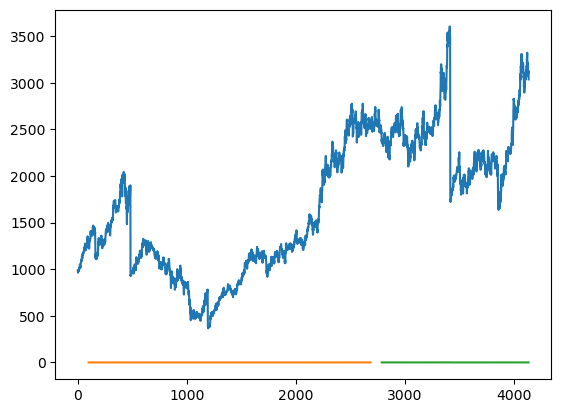

In [32]:
## Shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
### Shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :]= numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
### plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show